# BOOM BIKES

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt 
import seaborn as sns


In [2]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')


### Reading Data

In [4]:
# Loading the Dataframe

df = pd.read_csv(r"C:\Users\divya\Downloads\day.csv")

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Checking the shape

df.shape

(730, 16)

In [7]:
# Checking if any missing values

df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# Checking the statistics of the each column in the Dataset

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [11]:
# Filling in the encoded values for the columns 

df["season"].replace({1:'Spring',2:"Summer",3:"Fall",4:"Winter"} , inplace = True )
df["mnth"].replace({1:'January',2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"}  , inplace = True )
df["weekday"].replace({0:"Sunday",1:'Monday',2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"}  , inplace = True )
df["weathersit"].replace({1:"Clear + Partly Cloudy",2:"Mist + Cloudy",3:"Light Rain",4:"Heavy Rain"}  , inplace = True )
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,January,0,Monday,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,January,0,Tuesday,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,January,0,Wednesday,1,Clear + Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,January,0,Thursday,1,Clear + Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,January,0,Friday,1,Clear + Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Visualising the Data

 We will consider "cnt" to base our model.

### Analysisng the relationships between continuous variables

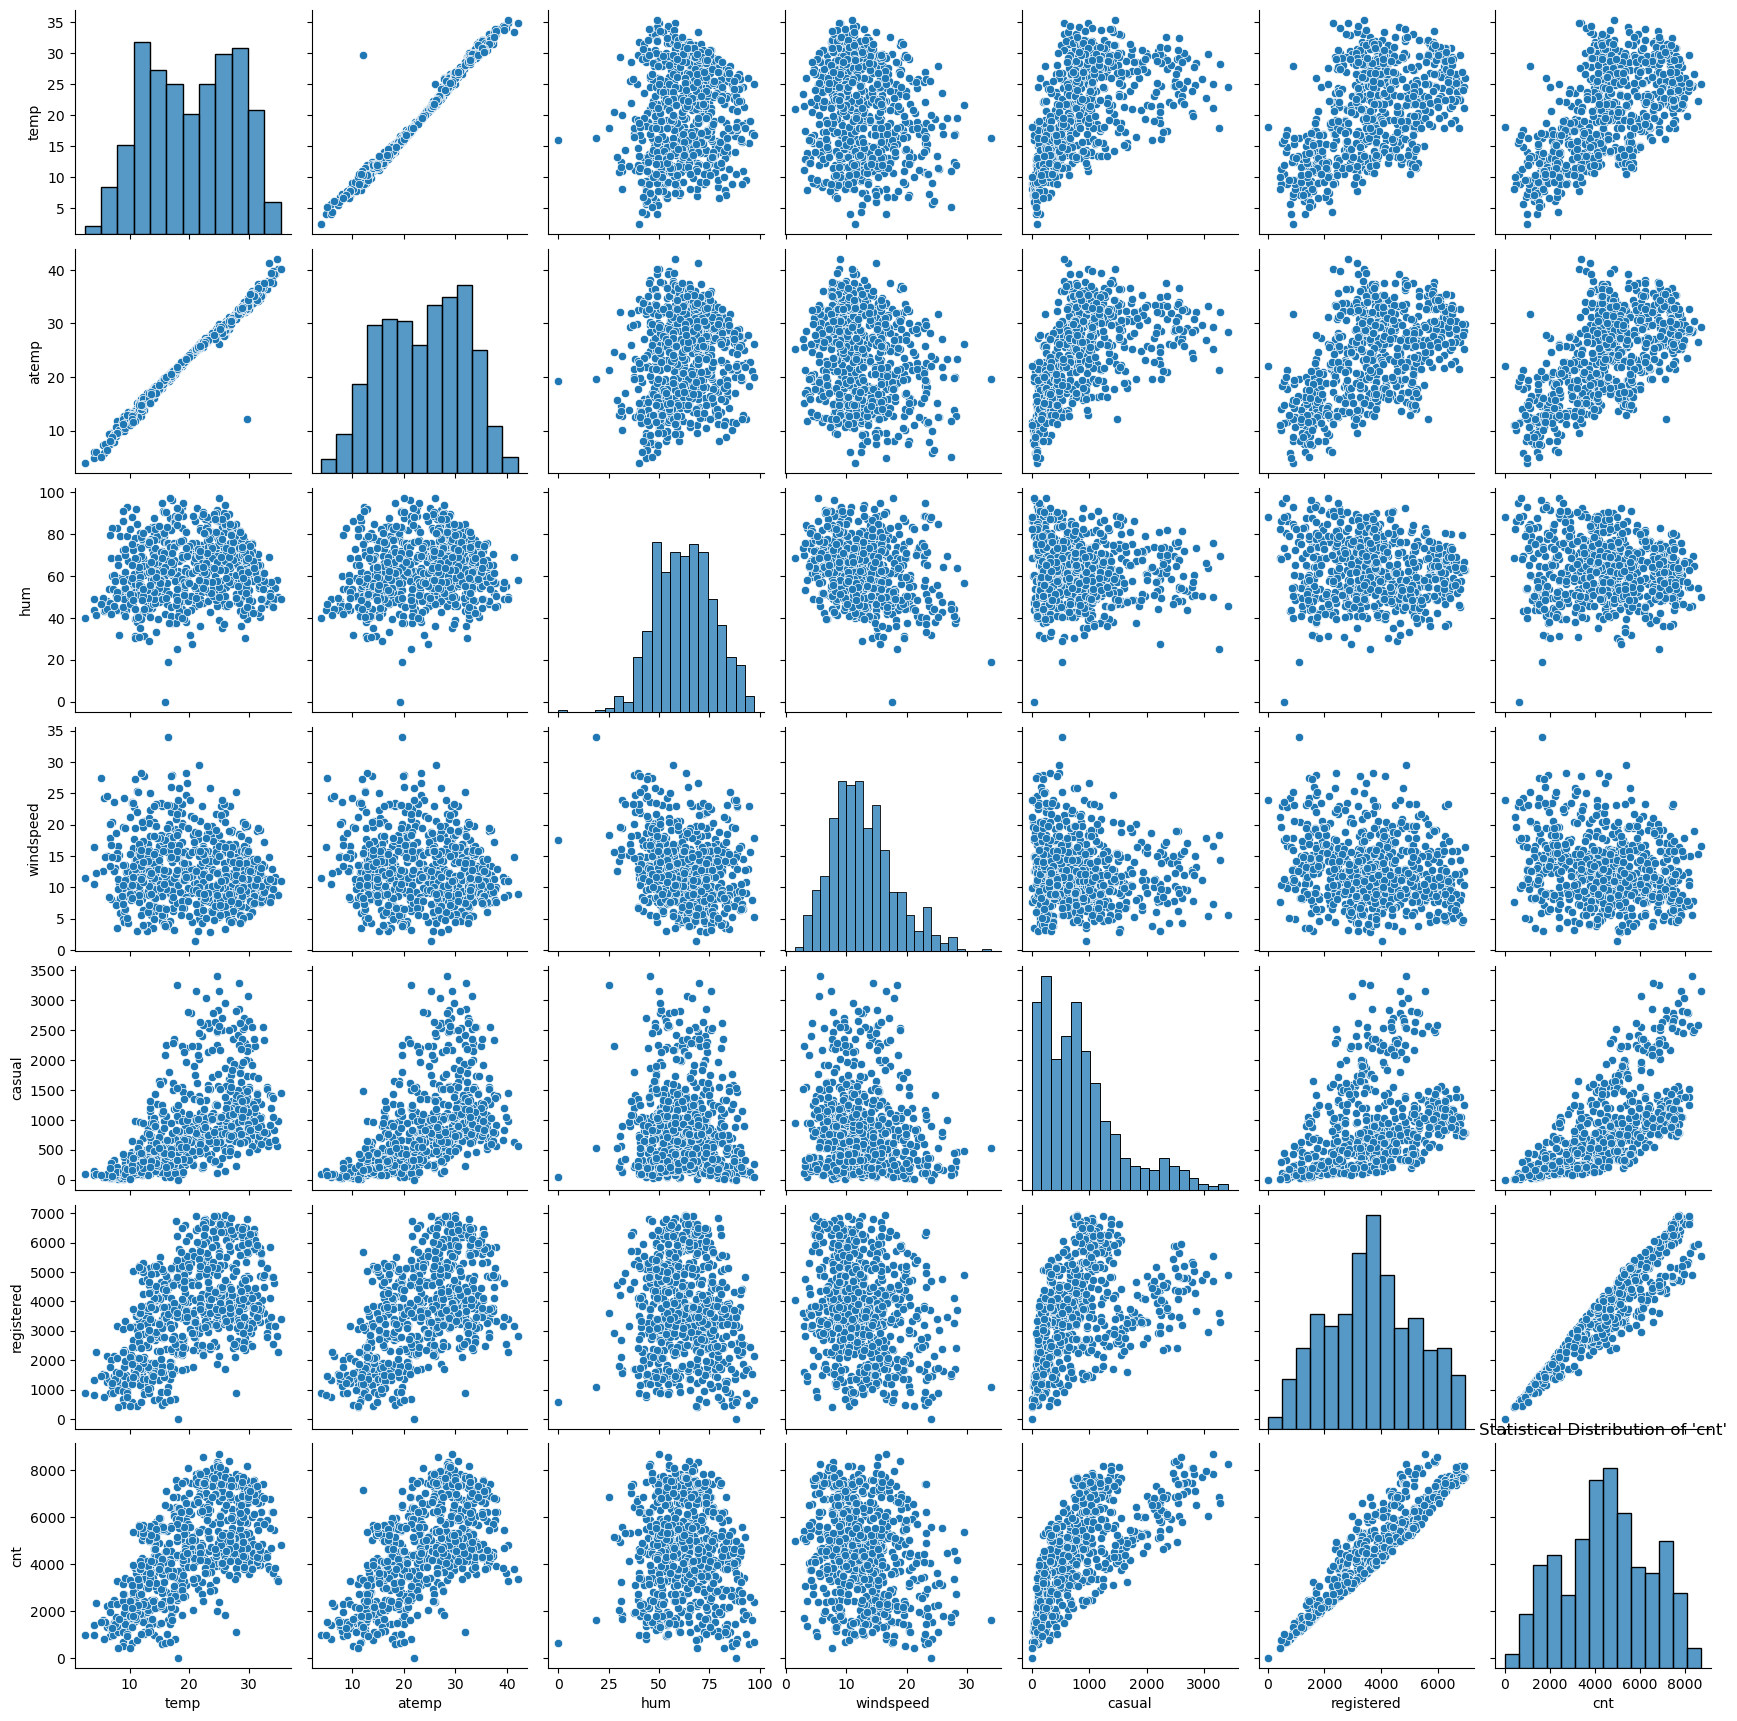

In [14]:
# Visually analysing continuous variables through scatter plots

sns.pairplot(df[["temp","atemp","hum","windspeed","casual","registered","cnt"]])

plt.show()



In [15]:
corr = df[['temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']].corr()
corr

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


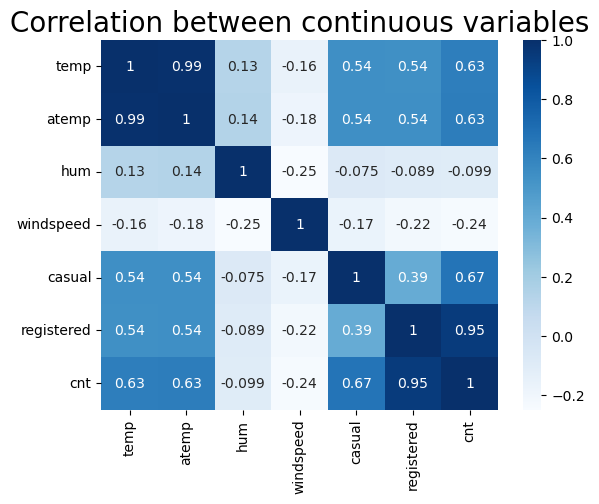

In [16]:
# We check the correlations between Continuous variables

sns.heatmap( corr, annot=True, cmap="Blues")
plt.title("Correlation between continuous variables", fontsize = 20)
plt.show()

### Heatmap Inference :

1. We see that "atemp" and "temp" has a very high correlation , so we delete one of these. Since atemp is derived from temo , we delete atemp ad keep temp.

2.Here we notice that "casual" & "registered" has high correlation with the variable "cnt". We can drop both these variables as "cnt" is the sum of these two variables. 



In [17]:
# Dropping columns which we dont require for our  model  

df.drop(["instant","dteday"],axis=1,inplace=True)


# Dropping the columns "casual" & "registered"  

df.drop(["casual","registered"],axis=1,inplace=True)



In [18]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

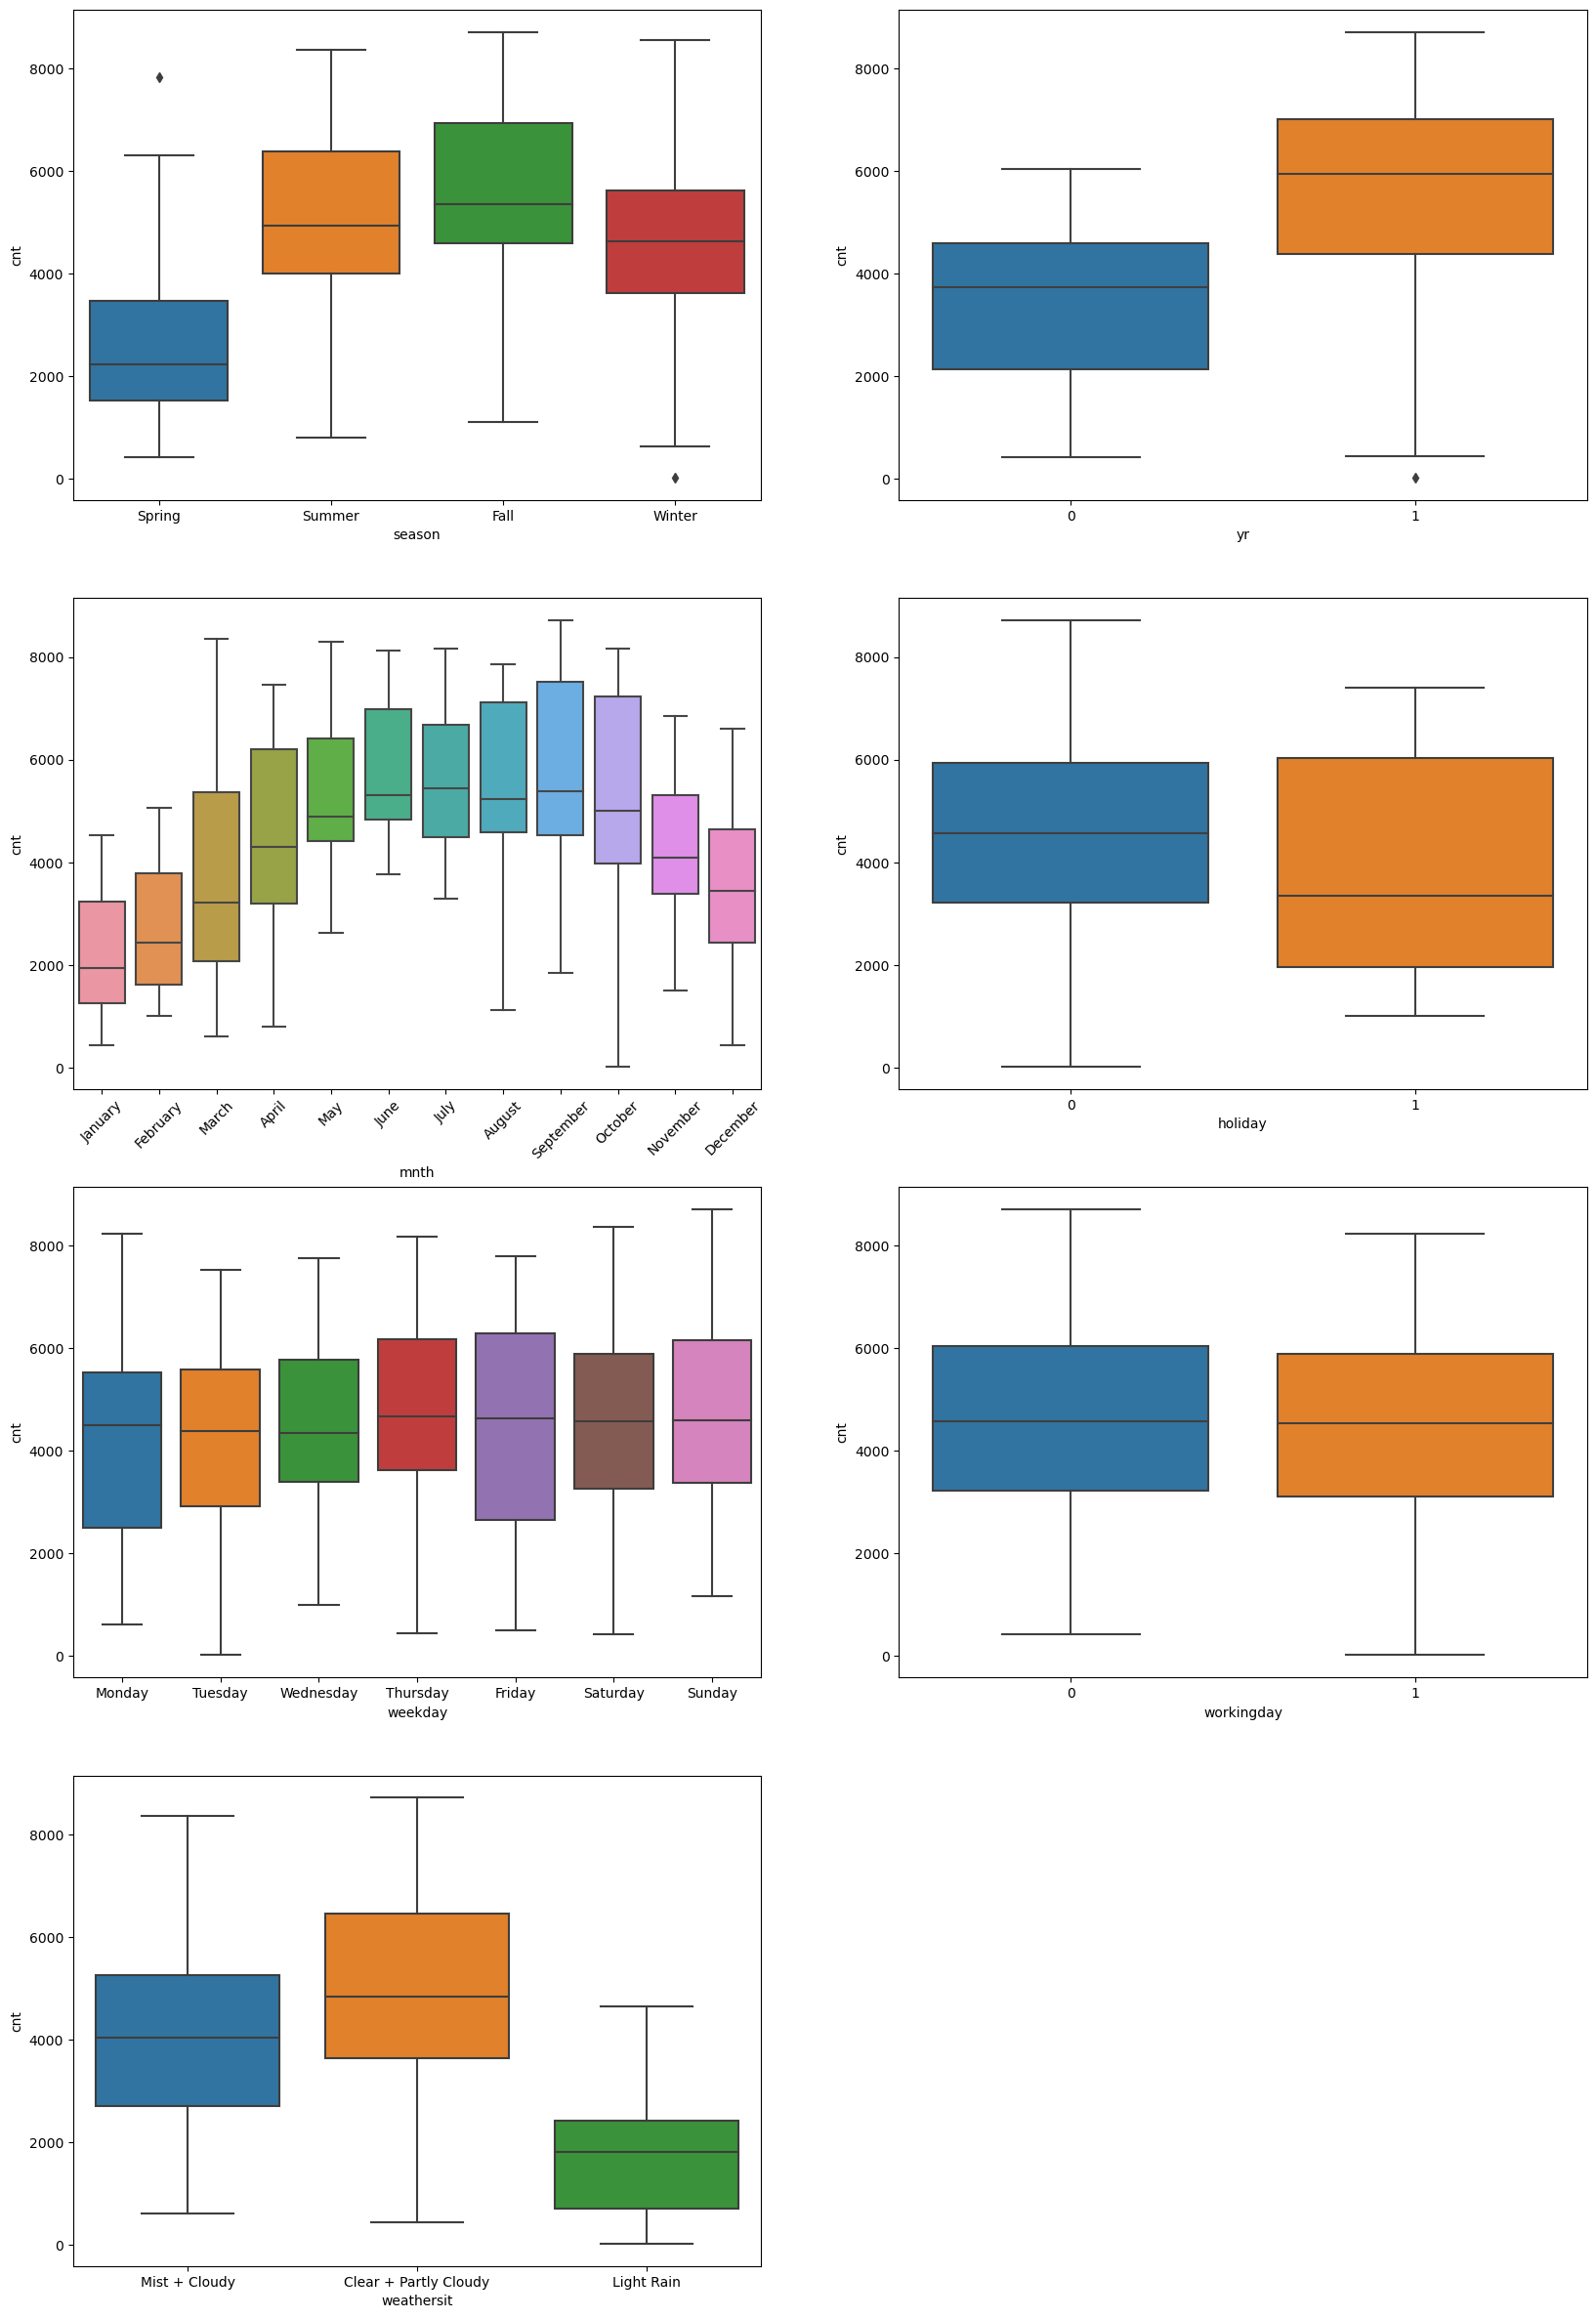

In [19]:
#visually analysing the categorical variables through box plots.

plt.figure(figsize = (20,30))
plt.title("Analysing categorical varaiables")


plt.subplot(4,2,1)
sns.boxplot( x="season" , y="cnt" , data = df)
plt.subplot(4,2,2)
sns.boxplot( x="yr" , y="cnt" , data = df)
plt.subplot(4,2,3)
sns.boxplot( x="mnth" , y="cnt" , data = df)
plt.xticks(rotation=45)
plt.subplot(4,2,4)
sns.boxplot( x="holiday" , y="cnt" , data = df)
plt.subplot(4,2,5)
sns.boxplot( x="weekday" , y="cnt" , data = df)
plt.subplot(4,2,6)
sns.boxplot( x="workingday" , y="cnt" , data = df)
plt.subplot(4,2,7)
sns.boxplot( x="weathersit" , y="cnt" , data = df)

plt.show()


### Here we notice :
    1. "Fall" is the most preferred season followed by "Summer"
    2. Significantly more people rented in 2019 as compared to 2018.
    3. Most bikes were rented in the periofd from "June" to "October". 
    4. The median of the bikes rented around the week was aproximaately around 4700.
    5. Clear + partly coudy has the most demand in weathersit.
    6. It would be safe to say that year end and year beginning has the least demand due to the extreme climate.
    7. Demands can be seem plumeting after October.
    8. More bikes are rented on holidays.

In [20]:

df.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Clear + Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349


### Creating dummy variables

In [21]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [22]:
# Creating dummy variables for categorical variables

df1 = pd.get_dummies(df,columns=["season","mnth","weekday","weathersit"],drop_first=True)
df1.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain,weathersit_Mist + Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Splitting data into train set and test set:

df_train , df_test = train_test_split(df1  , train_size = 0.7 , random_state = 100)


### Rescaling Features

In [29]:
# Normalisation 

scaler = MinMaxScaler()

In [30]:
#scaling the columns with high values 

num_vars = ['temp','atemp','hum', 'windspeed', 'cnt']

In [31]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain,weathersit_Mist + Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


In [32]:
#Checking if the values are scaled properly 

df_train.describe()    

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain,weathersit_Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Building the Model 

### Using RFE and manual approach 

In [33]:
#Dividing the df_train set to x_train and y_train :

y_train = df_train.pop("cnt")
X_train = df_train

In [34]:
# selecting the best features for our model through automated selection.

lm = LinearRegression()
lm.fit(X_train , y_train)
rfe = RFE ( estimator = lm, n_features_to_select = 15)
rfe = rfe.fit(X_train , y_train)

In [35]:
# Storing the features selected in a variable

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_December', 'mnth_January',
       'mnth_July', 'mnth_November', 'mnth_September', 'weathersit_Light Rain',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [36]:
# Features not selected 

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_August', 'mnth_February', 'mnth_June',
       'mnth_March', 'mnth_May', 'mnth_October', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [37]:
# Creating a function to check the vif

def vif(df) :
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF',ascending=False)
    return vif
    


## Model 1

In [38]:
# Creating a datagrame which contains the selected features

X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_December,mnth_January,mnth_July,mnth_November,mnth_September,weathersit_Light Rain,weathersit_Mist + Cloudy
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1


In [39]:
#Checking the initial vif score of alll the selected features

vif(X_train_rfe)

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,season_Spring,4.37
7,season_Winter,4.06
6,season_Summer,2.82
14,weathersit_Mist + Cloudy,2.32
0,yr,2.09
11,mnth_November,1.85
9,mnth_January,1.75


In [40]:
# Adding a constant variable

X_train_sm = sm.add_constant(X_train_rfe)

# Running the linear model

lr = sm.OLS(y_train,X_train_sm)

# Fit

lr_model = lr.fit()


In [41]:
# Checking the model summary

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          8.15e-189
Time:                        18:19:18   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.3197      0.036      8.859      0.000       0.249       0.391
yr                           0.2304      0.008     28.487      0.000       0.215       0.246
holiday                     -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp                         0.4815      0.037     13.005      0.000       0.409       0.554
hum                         -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed                   -0.1887      0.026     -7.315      0.000      -0.239      -0.138
season_Spring               -0.0613      0.021     -2.881      0.004      -0.103      -0.019
season_Summer                0.0423      0.015      2.761      0.006       0.012       0.072
season_Winter                0.1019      0.018      5.656      0.000       0.067       0.137
mnth_December               -0.0355      0.018     -2.024      0.043      -0.070      -0.001
mnth_January                -0.0434      0.018     -2.393      0.017      -0.079      -0.008
mnth_July                   -0.0553      0.018     -3.030      0.003      -0.091      -0.019
mnth_November               -0.0387      0.019     -2.057      0.040      -0.076      -0.002
mnth_September               0.0755      0.017      4.466      0.000       0.042       0.109
weathersit_Light Rain       -0.2465      0.026     -9.331      0.000      -0.298      -0.195
weathersit_Mist + Cloudy    -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Checkng the vif score

vif(X_train_rfe)

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,season_Spring,4.37
7,season_Winter,4.06
6,season_Summer,2.82
14,weathersit_Mist + Cloudy,2.32
0,yr,2.09
11,mnth_November,1.85
9,mnth_January,1.75


In [43]:
#Dropping the feature "hum" as it has a high vif and all the p-values are under 0.05

X_train_new = X_train_rfe.drop(['hum'], axis = 1)

## Model 2

In [44]:
# Checkng the vif score

vif(X_train_new)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,season_Winter,2.95
4,season_Spring,2.89
5,season_Summer,2.24
0,yr,2.07
10,mnth_November,1.81
8,mnth_January,1.66
9,mnth_July,1.59
13,weathersit_Mist + Cloudy,1.57


In [45]:
# Add a constant
X_train_sm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_sm2)

# Fit
lr_model2 = lr2.fit()

# Checking the model summary
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          4.75e-186
Time:                        18:19:18   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2450      0.032      7.618      0.000       0.182       0.308
yr                           0.2345      0.008     28.687      0.000       0.218       0.251
holiday                     -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp                         0.4387      0.036     12.093      0.000       0.367       0.510
windspeed                   -0.1585      0.025     -6.276      0.000      -0.208      -0.109
season_Spring               -0.0713      0.021     -3.314      0.001      -0.113      -0.029
season_Summer                0.0349      0.015      2.251      0.025       0.004       0.065
season_Winter                0.0869      0.018      4.831      0.000       0.052       0.122
mnth_December               -0.0428      0.018     -2.413      0.016      -0.078      -0.008
mnth_January                -0.0500      0.018     -2.719      0.007      -0.086      -0.014
mnth_July                   -0.0500      0.019     -2.703      0.007      -0.086      -0.014
mnth_November               -0.0395      0.019     -2.064      0.040      -0.077      -0.002
mnth_September               0.0687      0.017      4.015      0.000       0.035       0.102
weathersit_Light Rain       -0.2917      0.025    -11.840      0.000      -0.340      -0.243
weathersit_Mist + Cloudy    -0.0801      0.009     -9.198      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Checkng the vif score

vif(X_train_new)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,season_Winter,2.95
4,season_Spring,2.89
5,season_Summer,2.24
0,yr,2.07
10,mnth_November,1.81
8,mnth_January,1.66
9,mnth_July,1.59
13,weathersit_Mist + Cloudy,1.57


In [63]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_Spring', 'season_Summer',
       'season_Winter', 'mnth_December', 'mnth_January', 'mnth_July',
       'mnth_November', 'mnth_September', 'weathersit_Light Rain',
       'weathersit_Mist + Cloudy'],
      dtype='object')

## Residual  Analysis

In [47]:
X_train_sm2.head(3)

,const,yr,holiday,temp,windspeed,season_Spring,season_Summer,season_Winter,mnth_December,mnth_January,mnth_July,mnth_November,mnth_September,weathersit_Light Rain,weathersit_Mist + Cloudy
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,1,0,0,1,0,0,0,0,0,0


In [48]:
y_train_pred = lr_model2.predict(X_train_sm2)

Text(0.5, 0, 'Errors')

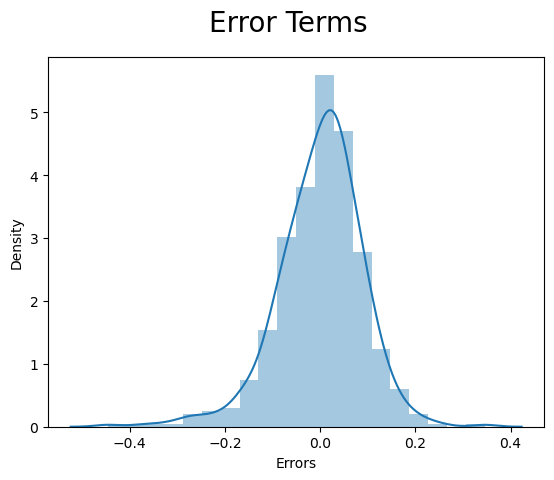

In [49]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 10) 

#### Inference : Residuals / error terms are normally distributed.

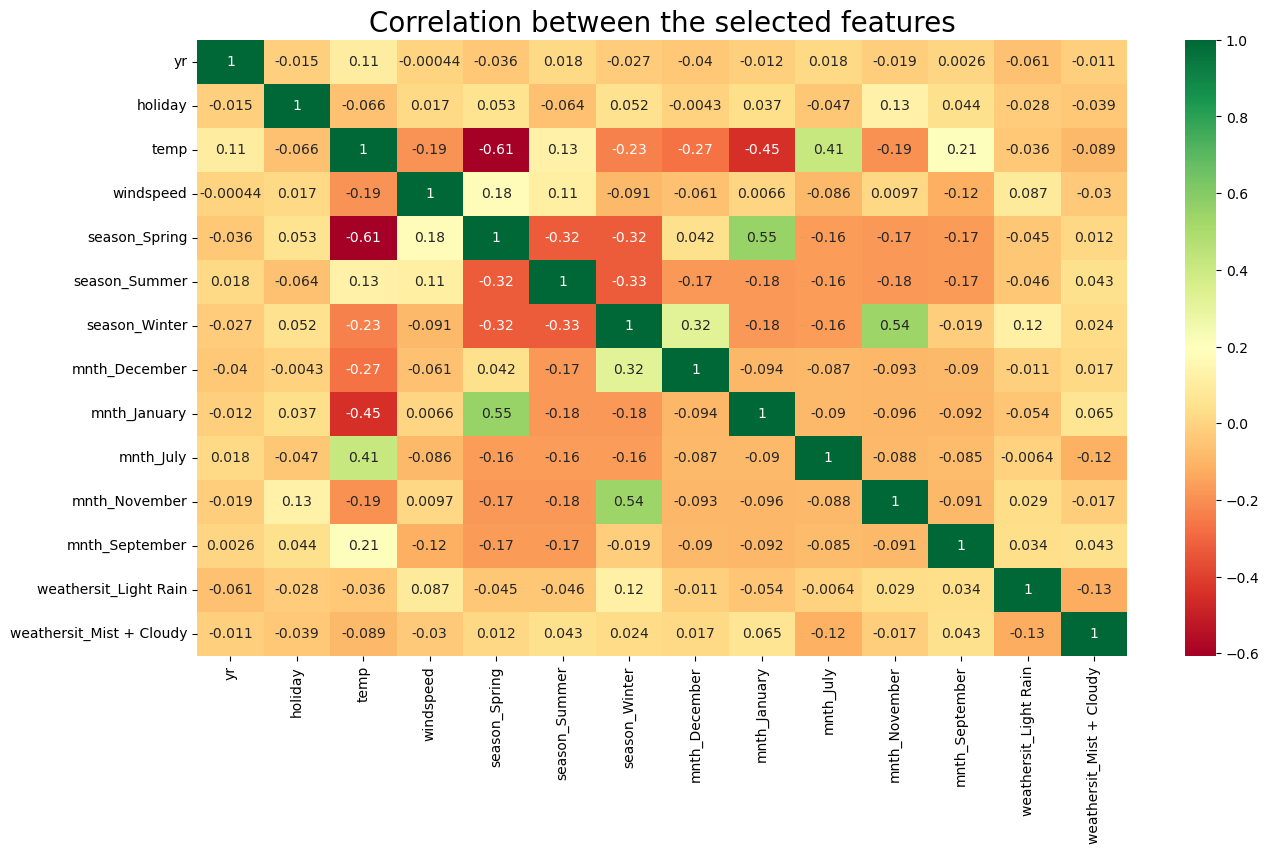

In [50]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.title("Correlation between the selected features" , fontsize = 20)
plt.show()

#### Inference : There is no multicolinearity as seen in the heatmap.

# Testing


In [52]:
#Scalinh the test set

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [53]:
#Splitting the test set into y_test and X_test

y_test = df_test.pop('cnt')
X_test = df_test



In [54]:
#Assigning a variable name to the final features

col1 = X_train_new.columns
col1

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_Spring', 'season_Summer',
       'season_Winter', 'mnth_December', 'mnth_January', 'mnth_July',
       'mnth_November', 'mnth_September', 'weathersit_Light Rain',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [55]:
#Selecting the final features to the X_test dataframe

X_test = X_test[col1]

# Adding constant variable to X_test dataframe

X_test_sm2 = sm.add_constant(X_test)

In [56]:
# Predicting

y_test_pred = lr_model2.predict(X_test_sm2)

In [57]:
#Checking the residuals

test_res = y_test - y_test_pred

Text(0.5, 0, 'Errors')

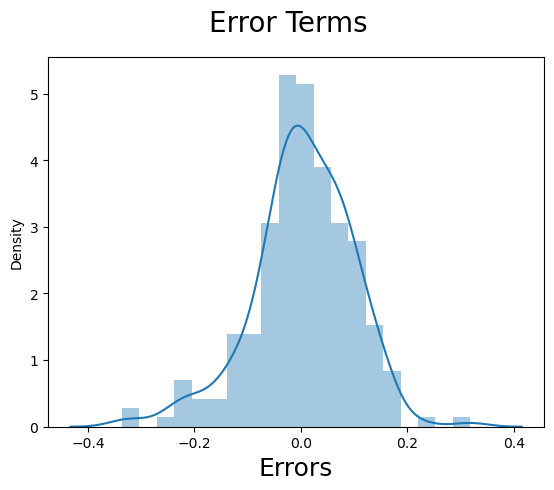

In [58]:
#Checking the distribution of the residuals

fig = plt.figure()
sns.distplot((test_res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18) 

# Model Evaluation

In [59]:
# Calculating the R squared for the train dataset

r2_train =  r2_score(y_train, y_train_pred)
round(r2_train,4)

# Calculating the R squared for the test dataset

r2_test = r2_score(y_test, y_test_pred)
round(r2_test,4)


print("R sq. Train set is : ", round(r2_train,4))
print("R sq. Test set is : ", round(r2_test,4))


R sq. Train set is :  0.8391
R sq. Test set is :  0.8137


### The R sq. values of both the Train set and Test set is close , which means that it can predict unseen values proficiently.

In [60]:
#Checking the coefficients of the model 

lr_model2.params

coeff = pd.DataFrame(lr_model2.params)
coeff.reset_index(inplace=True)
coeff.rename({'index':'Features',0:'Coeff'},axis=1,inplace=True)
coeff['Coeff'] = round(coeff['Coeff'],3)
coeff.sort_values(by='Coeff',ascending=False,inplace=True)

coeff

,Features,Coeff
3,temp,0.439
0,const,0.245
1,yr,0.234
7,season_Winter,0.087
12,mnth_September,0.069
6,season_Summer,0.035
11,mnth_November,-0.040
8,mnth_December,-0.043
9,mnth_January,-0.050
10,mnth_July,-0.050


In [61]:
lr_model2.params

const                       0.245029
yr                          0.234455
holiday                    -0.091776
temp                        0.438717
windspeed                  -0.158482
season_Spring              -0.071257
season_Summer               0.034890
season_Winter               0.086883
mnth_December              -0.042806
mnth_January               -0.050008
mnth_July                  -0.050046
mnth_November              -0.039513
mnth_September              0.068730
weathersit_Light Rain      -0.291749
weathersit_Mist + Cloudy   -0.080073
dtype: float64

# Final Equation 

### The Final Equation from the Model

Count = 0.245029+(0.234455 X yr)-(0.091776 X holiday)+(0.438717 X temp)-(0.158482 X windspeed)-(0.071257 X season_Spring)
        +(0.034890 X season_Summer)+(0.086883 X season_Winter)-(0.042806 X mnth_December)-(0.050008 X mnth_January)
        -(0.050046 X mnth_July)-(0.039513 X mnth_November)+(0.068730 X mnth_September)-(0.291749 X weathersit_Light Rain)
        -(0.080073 X weathersit_Mist + Cloudy)
